In [67]:
import numpy as np
import pandas as pd
import csv
from utils import new_columns, final_columns,columns_encoding
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import matplotlib.pyplot  as plt
import seaborn as sns

# What's my age again?
This notebook contains a basic model to predict if a person is over or under 18 years old based on some questions.

Firstly we need some training data. This must be simulated based upon a small set of "tuning" data. Much like in particle physics, our model must be simulated based upon some previous observation.

In [68]:
#First we load in the data from our questionaires
question_data = pd.read_csv("data/MachineLearningAlgorithms.csv")


Need to convert the questionaire into a more useful fromat for processing. This requires turning each multiple choice question into a binary question. For example, the question "What is your preferred payment method in shops for amounts less than £20?" has three possible answers: 
- I mostly use cash
- I mostly use cards
- I mostly use Apple Pay or Android Pay or Samsung Pay.

Instead of being one column for this question, it will become three; cash, cards, apple_pay. Each of these columns will then be either 1 or 0 depending on the users answer. This is much easier for machines to deal with than words.

Index(['Timestamp',
       '1. What is your musical taste? Select any genre  that you enjoy. Pick as many as you like.',
       '2. How do you listen to music?',
       '3. What is your film taste? Select any movie that you enjoyed watching. Pick as many as you like.',
       '4. What is your TV show taste? Select any TV series that you enjoyed watching. Pick as many as you like.',
       '5. What are your TV viewing habits?',
       '6. Which of the following social media apps do you regularly use?  Pick as many as you like.',
       '7. How many hours a week do you spend on your smart phone?',
       '8. What is your preferred payment method in shops for amounts less than £20?',
       '9. How old are you?'],
      dtype='object')
{1: ['1_classical', '1_rock', '1_country', '1_pop', '1_indie', '1_electronic', '1_hiphoprap', '1_none'], 2: ['2_cds', '2_stream', '2_radio', '2_youtube'], 3: ['3_wonderful', '3_starwars', '3_harrypotter', '3_loveactually', '3_casablanca', '3_toystory', '3_s

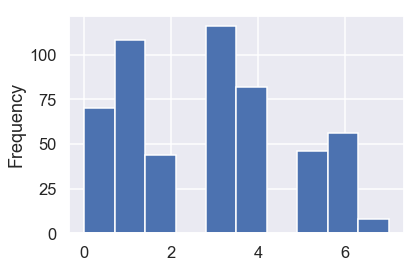

In [69]:
#load data               
test_frame = pd.read_csv("data/MachineLearningAlgorithms-8.csv")
test_frame = test_frame.dropna() #Get rid of any NaN
print(test_frame.columns)
plotting_frame = test_frame.copy()
for i,row in plotting_frame.iterrows():
    if row["9. How old are you?"] >=18:
        row["Over 18?"] = 1
    else:
        row["Over 18?"] = 0
    for col in row.keys()[1:9]:
        plotting_frame.at[i,col] = plotting_frame.at[i,col].split(";")
        temp_list = []
        for element in plotting_frame.at[i,col]:
            temp_list.append(columns_encoding[element])
        plotting_frame.at[i,col] = temp_list
questions = {}
for i in range(1,9):
    questions.update({i:[col for col in list(final_columns.values()) if str(i)+"_" in col]})

print(questions)

plotting_frame['Over 18'] = np.where(plotting_frame['9. How old are you?']>=18, 1, 0)
# sns.catplot(y="1. What is your musical taste? Select any genre  that you enjoy. Pick as many as you like.", hue="9. How old are you?", kind="count",
#             palette="pastel", edgecolor=".6",
#             data=test_frame);
dfL1 = pd.DataFrame(plotting_frame["1. What is your musical taste? Select any genre  that you enjoy. Pick as many as you like."].values.tolist(), index=plotting_frame.index).stack()
dfL1.plot(kind='hist')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


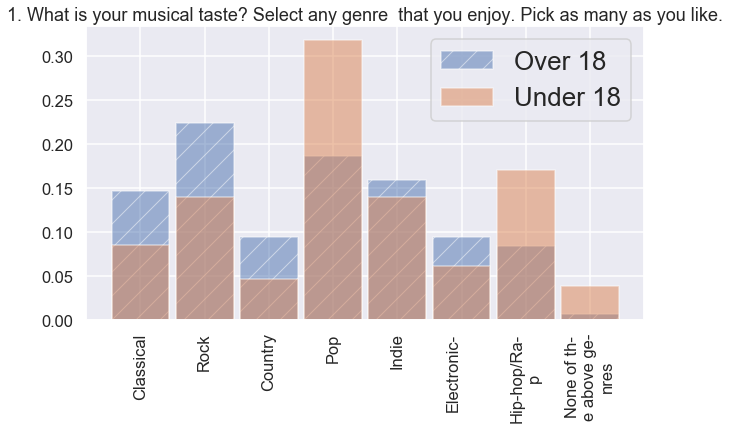

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


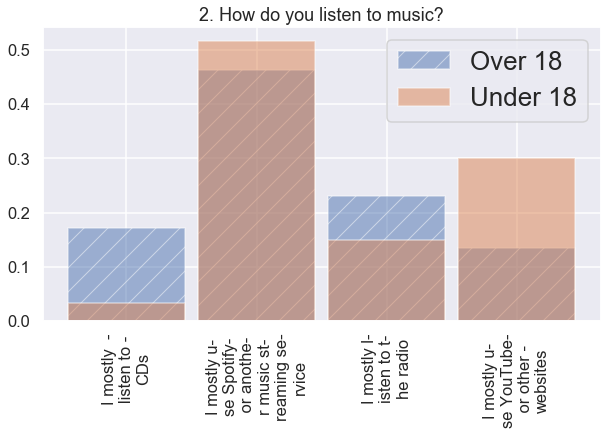

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


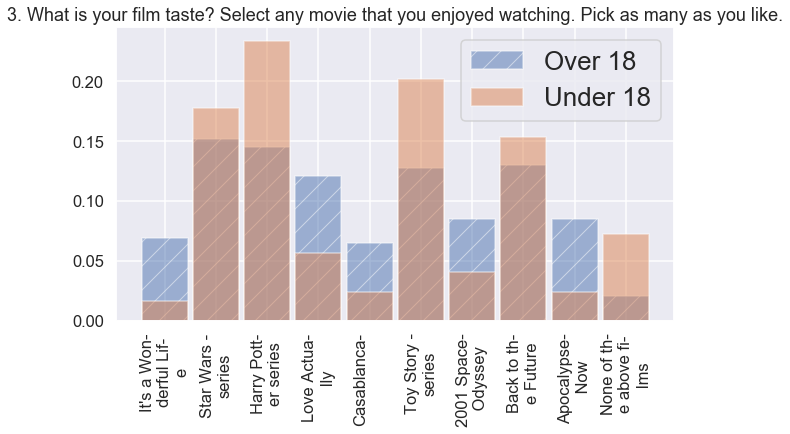

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


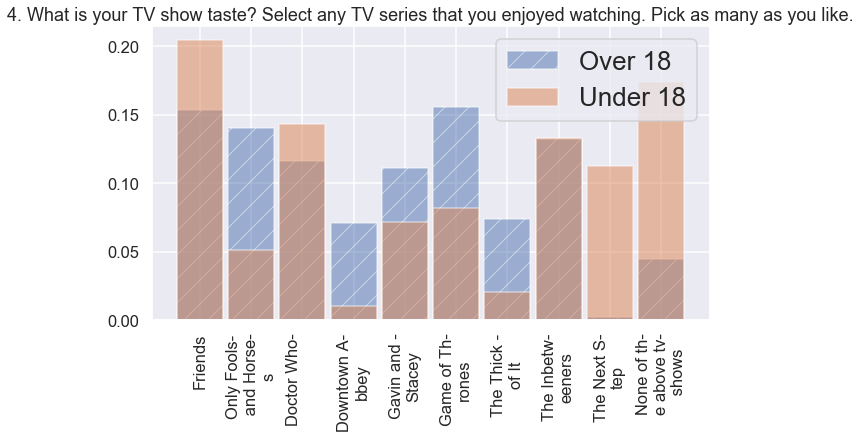

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


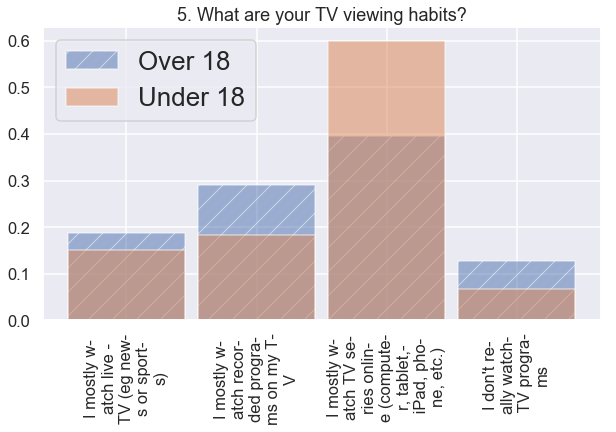

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


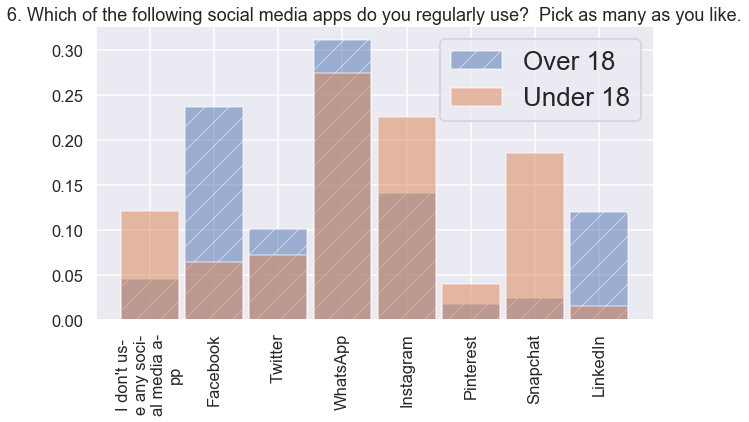

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


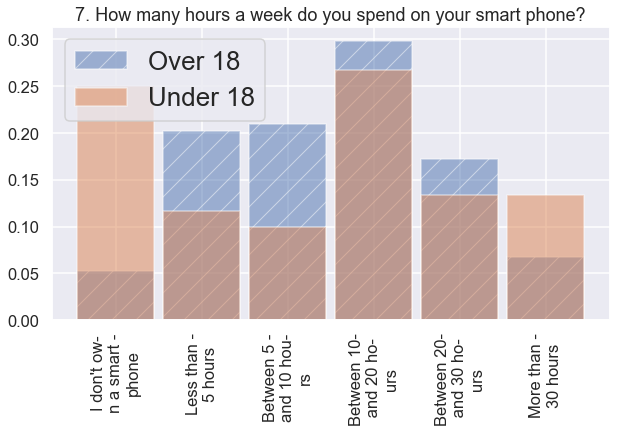

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


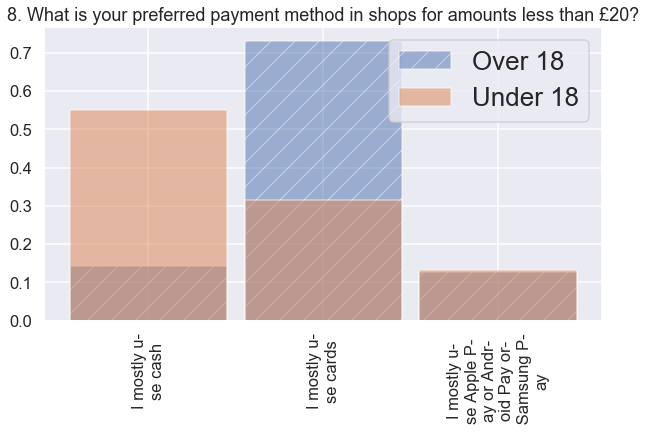

In [70]:
def plot_hist(df, column_name):
    import re
    inv_columns = {v: k for k, v in final_columns.items()}
    question_number = int(re.findall('\d+', column_name )[0])
    x_titles = [inv_columns[x] for x in questions[question_number]]
    x_titles = [re.sub("(.{10})", "\\1-\n", label, 0, re.DOTALL) for label in x_titles]
    over_18 = df["Over 18"] == 1
    under_18 = df["Over 18"] == 0
    over_18_frame = df[over_18]
    under_18_frame = df[under_18]
    over_18_stack = pd.DataFrame(over_18_frame[column_name].values.tolist(), index=over_18_frame.index).stack()
    under_18_stack = pd.DataFrame(under_18_frame[column_name].values.tolist(), index=under_18_frame.index).stack()
    fig = plt.figure(figsize=(10,6))
    ax1 = fig.add_subplot(111)

    bins = np.arange(len(questions[question_number])+1)-.5
    plt.xticks(np.arange(len(questions[question_number])), x_titles, 
               rotation='vertical')
    ax1.hist(over_18_stack, bins=bins, 
             align="mid", normed=True,alpha=0.5, hatch="/", rwidth=0.9,
             label="Over 18")
    ax1.hist(under_18_stack, bins=bins, 
             align="mid", normed=True, alpha=0.5, rwidth=0.9,
            label="Under 18")
    plt.legend(fancybox=True,fontsize='x-large')
    plt.title(column_name)
    plt.subplots_adjust(bottom=0.2)
    plt.savefig("{0}.png".format(column_name.replace(" ","_")))
    plt.show()
    
for col in plotting_frame.columns[1:9]:
     plot_hist(plotting_frame, col)


In [101]:
def sns_plot_hist(df, column_name):
    import re
    inv_columns = {v: k for k, v in final_columns.items()}
    question_number = int(re.findall('\d+', column_name )[0])
    x_titles = [inv_columns[x] for x in questions[question_number]]
    x_titles = [re.sub("(.{10})", "\\1-\n", label, 0, re.DOTALL) for label in x_titles]
    over_18 = df["Over 18"] == 1
    under_18 = df["Over 18"] == 0
    over_18_frame = df[over_18]
    under_18_frame = df[under_18]
    over_18_stack = pd.DataFrame(over_18_frame[column_name].values.tolist(), index=over_18_frame.index).stack()
    under_18_stack = pd.DataFrame(under_18_frame[column_name].values.tolist(), index=under_18_frame.index).stack()
    bins = np.arange(len(questions[question_number])+1)-.5
    plt.figure(figsize=(12,8))
    sns.set()
    sns.set_style("darkgrid")
    sns.set_context("talk")
    sns.distplot(over_18_stack, kde = False, bins=bins, norm_hist=True, 
                      label="Over 18",palette="husl")
    sns.distplot(under_18_stack, kde = False, bins=bins, norm_hist=True,
                     label="Under 18")
    plt.xticks(np.arange(len(questions[question_number])), x_titles, 
               rotation='vertical')
    plt.title(column_name)
    plt.ylabel("Normalised to responses (a.u.)")
    plt.legend()
    plt.subplots_adjust(bottom=0.2)
    plt.savefig("{0}.pdf".format(column_name.replace(" ","_").replace(".", "").replace("?","")))
for col in plotting_frame.columns[1:9]:
     sns_plot_hist(plotting_frame, col)

TypeError: distplot() got an unexpected keyword argument 'palette'

<Figure size 864x576 with 0 Axes>

In [72]:
#Now to split up categories into binary features
temp_rows = []
for i,row in test_frame.head(n=200).iterrows():
    temp_dict = {key: 0 for key in final_columns.values()}
    for col in row[1:9]:
        for response in final_columns:
#             print(response)
            if response in col:
                temp_dict[final_columns[response]] = 1
    if row["9. How old are you?"] >=18:
        temp_dict["9_over18"] = 1
    
#     if "I mostly  listen to CDs" in row["2. How do you listen to music?"]:
       
#         temp_dict["2_cds"] = 1
    temp_rows.append(temp_dict)
    
  
new_questions_df = pd.DataFrame(temp_rows)
print(test_frame)
print(new_questions_df)

                        Timestamp  \
0     2019/06/19 5:34:02 PM GMT+1   
1     2019/06/19 5:37:30 PM GMT+1   
2     2019/06/19 5:40:40 PM GMT+1   
3     2019/06/19 5:49:52 PM GMT+1   
4     2019/06/19 5:54:18 PM GMT+1   
5     2019/06/19 5:55:07 PM GMT+1   
6     2019/06/20 9:50:45 AM GMT+1   
7    2019/06/20 10:27:09 AM GMT+1   
8    2019/06/20 10:30:23 AM GMT+1   
9    2019/06/20 10:36:11 AM GMT+1   
10   2019/06/20 10:38:50 AM GMT+1   
11   2019/06/20 10:44:11 AM GMT+1   
12   2019/06/20 10:50:00 AM GMT+1   
13   2019/06/20 10:57:25 AM GMT+1   
14   2019/06/20 11:12:44 AM GMT+1   
15   2019/06/20 11:26:40 AM GMT+1   
16   2019/06/20 11:33:24 AM GMT+1   
17   2019/06/20 11:37:05 AM GMT+1   
18   2019/06/20 11:37:20 AM GMT+1   
19   2019/06/20 11:37:56 AM GMT+1   
20   2019/06/20 11:39:40 AM GMT+1   
21   2019/06/20 11:42:39 AM GMT+1   
22   2019/06/20 11:45:20 AM GMT+1   
23   2019/06/20 11:47:39 AM GMT+1   
24   2019/06/20 12:00:41 PM GMT+1   
25   2019/06/20 12:07:21 PM GMT+1   
2

In [104]:
#Splitting data into over and under 18
over_18_df = new_questions_df[new_questions_df["9_over18"] == 1]
under_18_df = new_questions_df[new_questions_df["9_over18"] == 0]

print("Number of answers under 18: {0}".format(len(under_18_df)))
print("Number of answers over 18: {0}".format(len(over_18_df)))

Number of answers under 18: 60
Number of answers over 18: 134


In [74]:
#Getting the probability for each feature - both for under and over 18
over_18_prob = {}
under_18_prob = {}
for col in final_columns.values():
    col_vals_over = over_18_df[col]
    col_vals_under = under_18_df[col]

    over_18_prob.update({col:col_vals_over.mean()})
    under_18_prob.update({col: col_vals_under.mean()})

In [75]:
#Get the colum value given a probability based upon our 'tuning' data
def get_col_val(over_18_prob, under_18_prob):
    if np.random.rand(1) >= 0.5:
        if np.random.rand(1) > over_18_prob:
            return 1
        else:
            return 0
    else:
        if np.random.rand(1) > under_18_prob:
            return 1
        else:
            return 0

def generate_data(over_18_prob, under_18_prob, n):
    new_data = []
    for x in range(0,n):
        temp_dict = {key: get_col_val(over_18_prob[key], under_18_prob[key]) for key in new_columns.values()}
        new_data.append(temp_dict)
    temp_df = pd.DataFrame(new_data)
    return  temp_df



/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


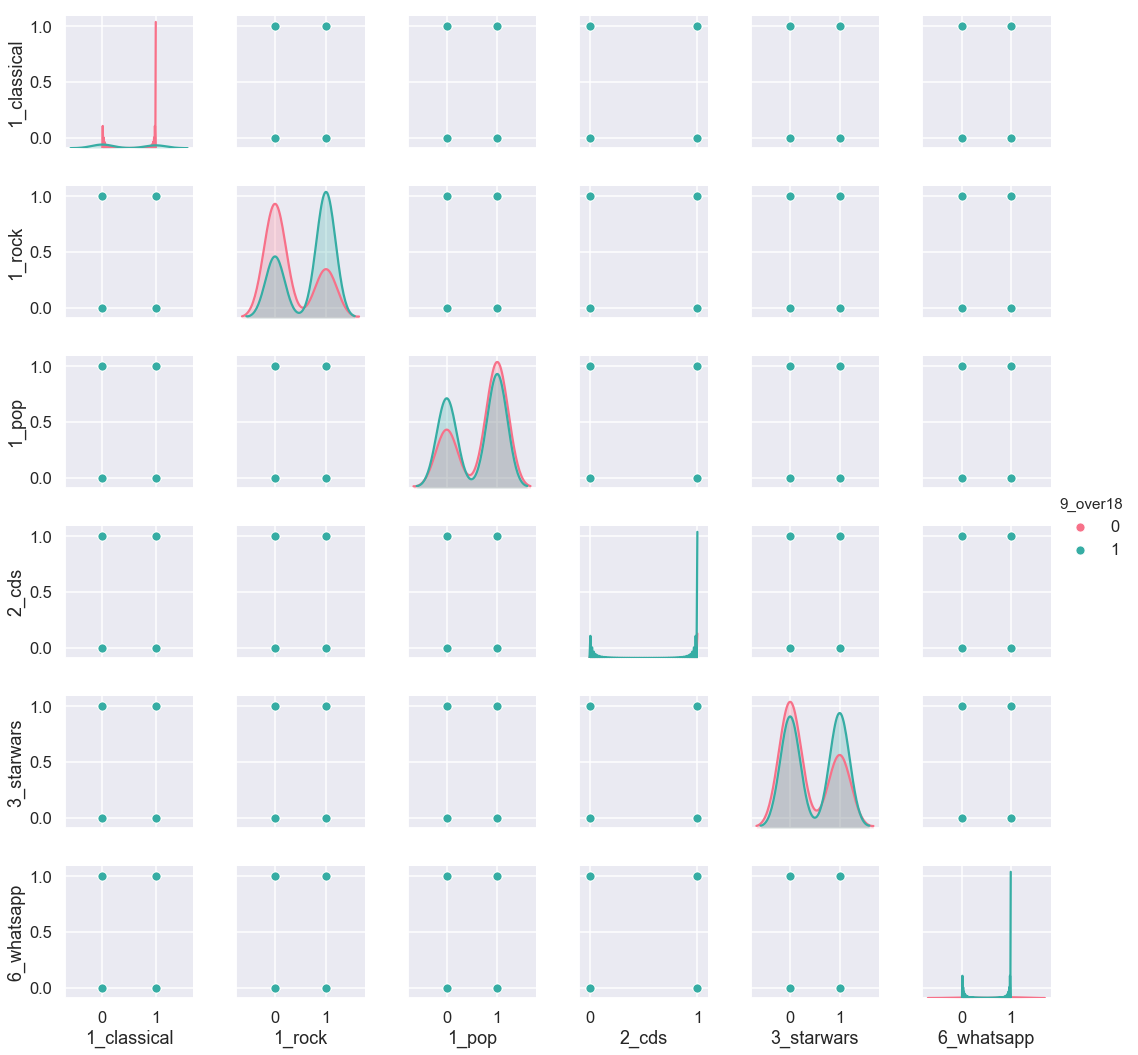

In [100]:
# new_questions_df = generate_data(over_18_prob, under_18_prob, 10000)

sns.pairplot(new_questions_df,
            vars=["1_classical", "1_rock", "1_pop", "2_cds","3_starwars","6_whatsapp"],
            hue="9_over18",
            diag_kind="kde",
            palette="husl"
            )

In [13]:
array = new_questions_df.values
x = new_questions_df.iloc[:,0:53]
y = new_questions_df.iloc[:, -1]
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


In [66]:
# Feature extraction
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features


ValueError: Expected 2D array, got 1D array instead:
array=[9.99999985e-01 9.97527377e-01 9.99954602e-01 8.31528028e-07
 1.19202922e-01 9.99999168e-01 1.00000000e+00 9.99954602e-01
 9.97527377e-01 8.31528028e-07 2.47262316e-03 8.80797078e-01
 8.80797078e-01 4.53978687e-05 1.19202922e-01 9.99999168e-01
 1.52299795e-08 9.99954602e-01 8.31528028e-07 1.00000000e+00
 9.97527377e-01 8.31528028e-07 9.99954602e-01 9.99999168e-01
 9.97527377e-01 1.52299795e-08 1.19202922e-01 8.31528028e-07
 9.99954602e-01 2.47262316e-03 1.19202922e-01 9.99954602e-01
 9.99999168e-01 9.99954602e-01 8.80797078e-01 8.80797078e-01
 1.19202922e-01 9.99954602e-01 2.78946809e-10 8.80797078e-01
 1.00000000e+00 2.47262316e-03 4.53978687e-05 8.80797078e-01
 8.31528028e-07 9.97527377e-01 2.78946809e-10 1.00000000e+00
 1.52299795e-08 9.99954602e-01 2.47262316e-03 8.80797078e-01
 8.80797078e-01 9.99999168e-01 9.99999168e-01 5.10908903e-12
 5.10908903e-12 8.31528028e-07 1.19202922e-01 9.99954602e-01
 9.99999985e-01 5.10908903e-12 1.19202922e-01 9.97527377e-01
 9.99999168e-01 9.99954602e-01 8.31528028e-07 9.97527377e-01
 8.80797078e-01 1.19202922e-01 2.47262316e-03 1.19202922e-01
 4.53978687e-05 4.53978687e-05 1.52299795e-08 2.47262316e-03
 9.35762297e-14 9.99954602e-01 8.31528028e-07 9.99954602e-01
 9.99999985e-01 1.19202922e-01 9.99954602e-01 4.53978687e-05
 9.99954602e-01 1.19202922e-01 9.97527377e-01 1.19202922e-01
 9.99954602e-01 8.80797078e-01 9.99954602e-01 9.97527377e-01
 5.10908903e-12 9.99999985e-01 9.99999168e-01 1.52299795e-08
 9.99999985e-01 9.97527377e-01 9.99954602e-01 9.99954602e-01
 8.80797078e-01 9.99999985e-01 1.19202922e-01 1.19202922e-01
 1.00000000e+00 9.99999168e-01 8.80797078e-01 2.47262316e-03
 1.00000000e+00 8.80797078e-01 9.99954602e-01 8.31528028e-07
 9.99999168e-01 9.99954602e-01 9.97527377e-01 2.47262316e-03
 1.00000000e+00 9.99954602e-01 1.19202922e-01 2.47262316e-03
 4.53978687e-05 9.99999985e-01 1.00000000e+00 2.78946809e-10
 1.19202922e-01 8.31528028e-07 1.19202922e-01 8.80797078e-01
 1.19202922e-01 8.31528028e-07 1.52299795e-08 9.97527377e-01
 1.52299795e-08 8.31528028e-07 9.99954602e-01 2.78946809e-10
 9.99999168e-01 1.52299795e-08 8.80797078e-01 1.00000000e+00
 1.00000000e+00 2.47262316e-03 2.47262316e-03 4.53978687e-05
 9.99999168e-01].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


[0.07509215 0.00347274 0.01662928 0.00714558 0.01630823 0.00513895
 0.00995408 0.04651179 0.0133279  0.00793939 0.01018621 0.0114816
 0.02062298 0.01496229 0.01374394 0.01294927 0.00932832 0.00346916
 0.01329938 0.01741999 0.00770259 0.00913247 0.0075095  0.01383745
 0.00888443 0.04023144 0.00741007 0.0157045  0.0072597  0.03812601
 0.02715223 0.00886033 0.01539145 0.00346751 0.01896263 0.00305401
 0.06616632 0.02121602 0.03300144 0.0092262  0.00564142 0.07085627
 0.02267729 0.01798423 0.01055563 0.0073362  0.00353406 0.01193997
 0.01472732 0.01638151 0.00085458 0.05470491 0.07152705]


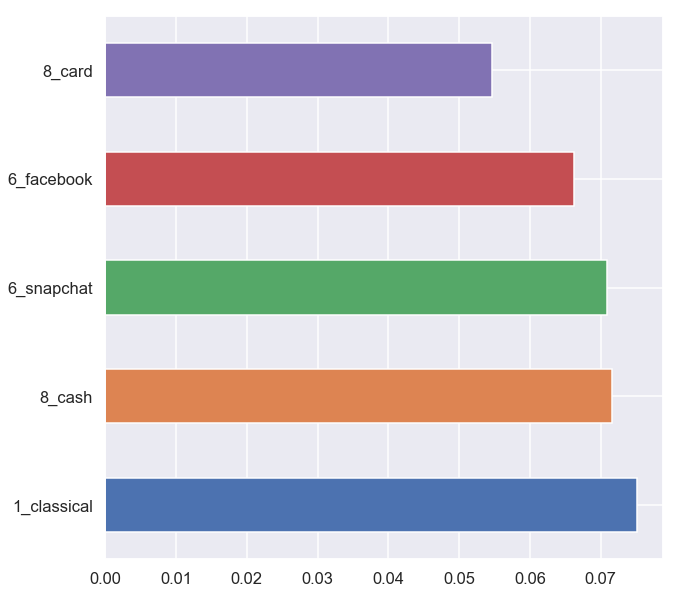

In [15]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
plt.figure(figsize=(10,10))
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

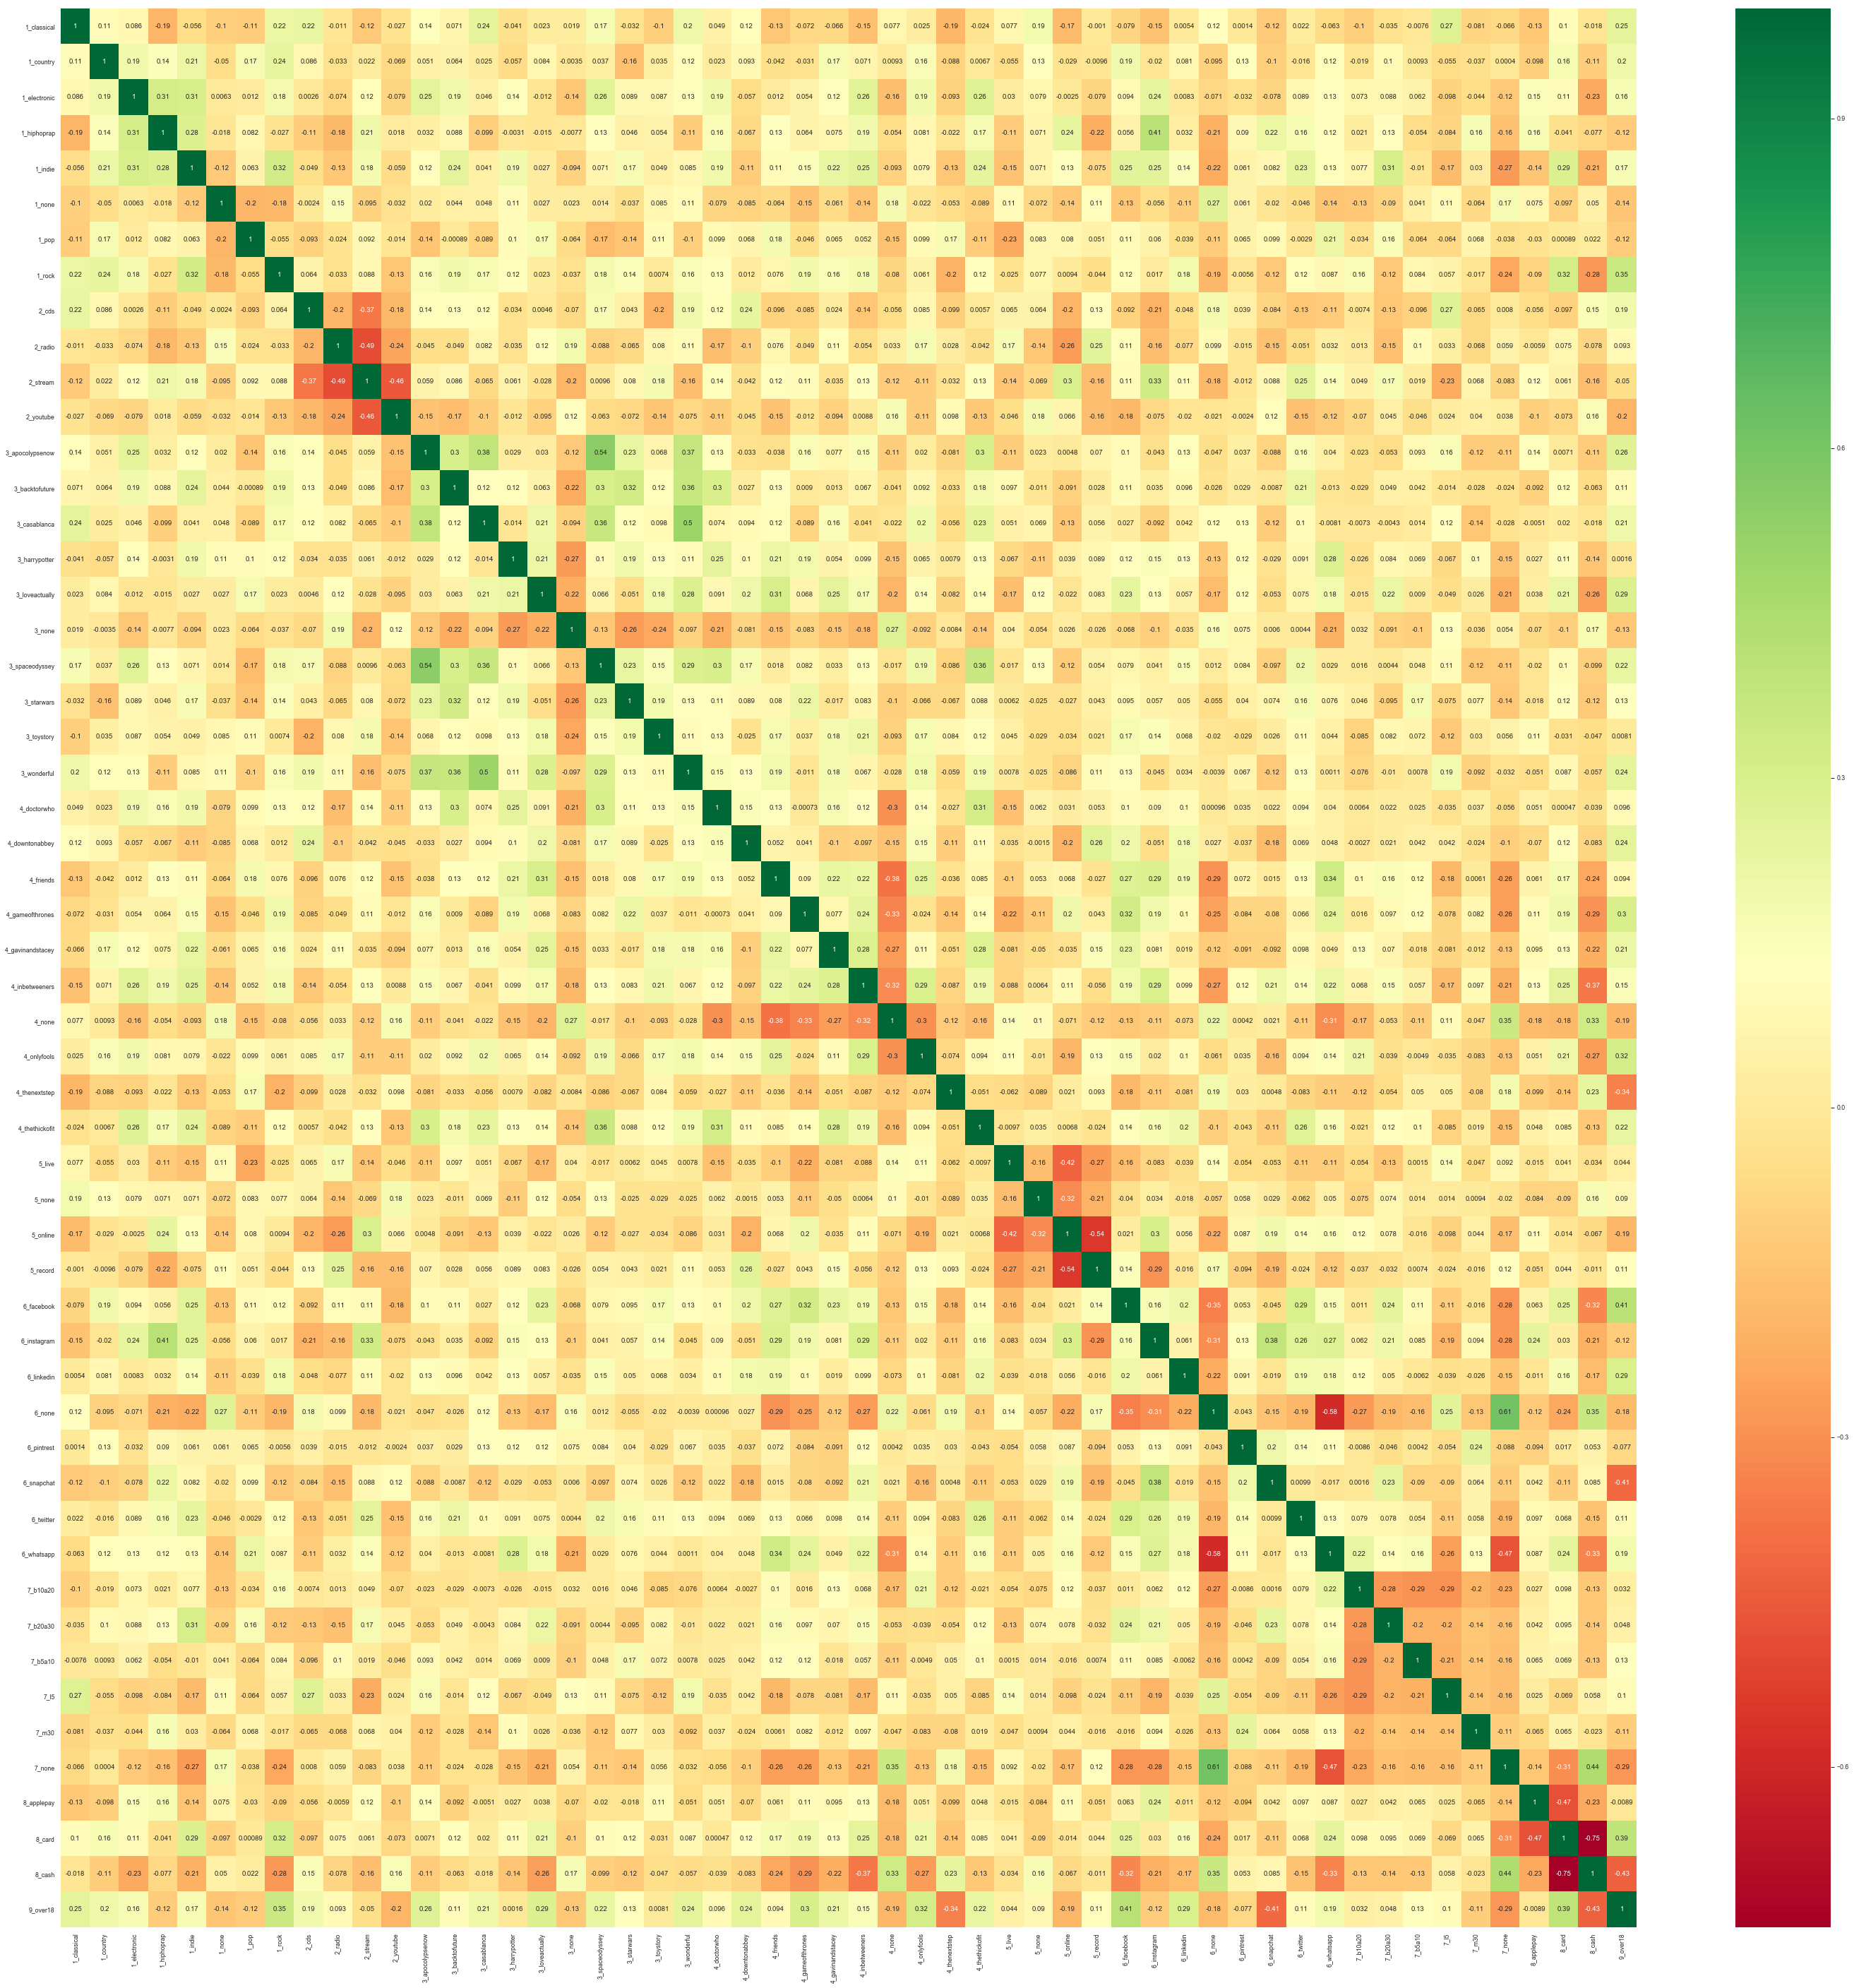

In [16]:

#get correlations of each features in dataset
corrmat = new_questions_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(50,50))
#plot heat map
sns.set_context("paper")
g=sns.heatmap(new_questions_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")
plt.savefig("corr.pdf")

In [17]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.externals import joblib
from sklearn.metrics import roc_curve, auc,confusion_matrix
from sklearn.tree import export_graphviz

test_fraction = 0.25
train_data, test_data = train_test_split(new_questions_df, test_size=test_fraction)

In [18]:
def standardize_data(train_data, test_data, names):
    scaler  = StandardScaler()
    scaler.fit(train_data[names])
    
    X_train = scaler.transform(train_data[names])
    X_train = train_data[names]
    y_train = np.array(train_data['9_over18'])

    X_test  = scaler.transform(test_data[names])
    X_test = test_data[names]
    y_test  = np.array(test_data['9_over18'])
    return (X_train, X_test, y_train, y_test, scaler)


In [19]:
questions = {}
for i in range(1,9):
    questions.update({i:[col for col in list(final_columns.values()) if str(i)+"_" in col]})


columns_to_use = list(final_columns.values())

columns_to_use = questions[1] + questions[3] + questions[4] + questions[2] + questions[5] + questions[6]
X_train, X_test, y_train, y_test, scaler = standardize_data(train_data, test_data, columns_to_use)
                                                    
type(X_train), X_train.shape, type(y_train), y_train.shape

(pandas.core.frame.DataFrame, (145, 44), numpy.ndarray, (145,))

In [52]:
dt  = DecisionTreeClassifier(max_depth=5,
                             min_samples_leaf=25,
                            max_features=10,
                            splitter = "best",
                            criterion="entropy")

ada = AdaBoostClassifier(dt, 
                         n_estimators=100, 
                         random_state=1,)
#                          algorithm="SAMME")

# possible combinations of params
params = {'base_estimator__min_samples_leaf': [5,7,10,25,30],
          'base_estimator__max_depth': [2,3,7,10],
          'base_estimator__max_features': [3,4,5,6,7,8,9,10],
          'base_estimator__splitter':["best", "random"],
          'base_estimator__criterion':["gini", "entropy"],
          'n_estimators' : [25,30,50,100],
          'learning_rate':[0.01,0.1,1]
         }

In [53]:
print("*** TRAINING ***")
rcv = GridSearchCV(ada, params, verbose=1, n_jobs=-1)
rcv.fit(X_train, y_train)

print("Best set of parameters: %s" % rcv.best_params_)

adabest = rcv.best_estimator_
adabest.fit(X_train, y_train)

print("Training set score: %f" % adabest.score(X_train, y_train))      
print("Test set score:     %f" % adabest.score(X_test,  y_test))

filename = 'u18.pkl'
print("save to %s" % filename)
joblib.dump([adabest, scaler], filename)


*** TRAINING ***
Fitting 3 folds for each of 7680 candidates, totalling 23040 fits


[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 744 tasks      | elapsed:   22.8s
[Parallel(n_jobs=-1)]: Done 1744 tasks      | elapsed:   52.2s
[Parallel(n_jobs=-1)]: Done 3144 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 4944 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 7000 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 8300 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 9800 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 11500 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 13400 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 15500 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 17800 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 20300 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 23000 tasks      | elapsed: 11.1min
[Parallel(n_jobs=-1)]: Done 23040 out of 23040 | elapsed: 11.1min finished


Best set of parameters: {'base_estimator__criterion': 'gini', 'base_estimator__max_depth': 2, 'base_estimator__max_features': 6, 'base_estimator__min_samples_leaf': 30, 'base_estimator__splitter': 'best', 'learning_rate': 1, 'n_estimators': 25}
Training set score: 0.896552
Test set score:     0.816327
save to u18.pkl


['u18.pkl']

In [54]:
fit = adabest.fit(X_train,y_train)
predict = fit.predict(X_test)
print(y_test)
print(predict)
print(confusion_matrix(y_test, predict))
print(fit.feature_importances_)

[1 0 0 1 1 1 1 0 1 0 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 0 1 0 1 0 1 1 0 0 1 0 1
 0 1 1 0 1 0 0 1 1 1 1 0]
[1 0 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 0 0
 1 1 1 0 0 0 0 1 1 1 1 0]
[[13  5]
 [ 4 27]]
[0.03913019 0.06206034 0.0281597  0.00070987 0.05114074 0.
 0.         0.         0.         0.03642706 0.07292152 0.05632678
 0.         0.09305617 0.01145232 0.00249619 0.03929013 0.
 0.         0.04134568 0.01964388 0.         0.02817592 0.10540685
 0.         0.01624847 0.         0.         0.         0.02327664
 0.         0.         0.         0.         0.06300353 0.
 0.         0.07451111 0.04071848 0.03805445 0.056444   0.
 0.         0.        ]


In [55]:
def predict_proba(ada, X_test):
    trees   = ada.estimators_
    weights = ada.estimator_weights_
    scores  = [((2*t.predict(X_test)-1)*w).tolist() for (t, w) in zip(trees, weights)]
    F = [0.0]*len(X_test)
    for j in range(len(X_test)):
        for i in range(len(trees)):
            F[j] += scores[i][j]
    F = np.array(F)
    p = 1.0/(1 + np.exp(-2*F))
    return p

In [56]:
p = predict_proba(adabest, X_test)
x = predict_proba(adabest, X_train)

(array([22.,  5.,  0.,  0.,  0.,  0.,  0.,  0.,  4., 18.]),
 array([5.10908903e-12, 1.00000000e-01, 2.00000000e-01, 3.00000000e-01,
        4.00000000e-01, 5.00000000e-01, 6.00000000e-01, 7.00000000e-01,
        8.00000000e-01, 9.00000000e-01, 1.00000000e+00]),
 <a list of 10 Patch objects>)

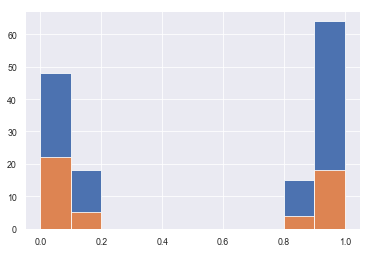

In [57]:
plt.hist(x)
plt.hist(p)

In [58]:
def plotDistribution(p, y_test, fgsize=(12, 6), arange=(0, 1), nbins=25):
    # separate probabilities into those for bad and good wines
    print(p)
    p_bad  = list(map(lambda x: x[0], filter(lambda x: x[-1], zip(p, y_test < 0.5))))
    p_good = list(map(lambda x: x[0], filter(lambda x: x[-1], zip(p, y_test > 0.5))))
    
    
    # set size of figure
    plt.figure(figsize=fgsize)
    plt.hist(p_bad,
             bins=nbins,
             color=(1,0,0),
             alpha=0.3,
             range=arange, 
            normed=True,
             label='Under 18')
    plt.legend(loc='upper left',
              fontsize=18) # show legend using specified "label"
    
    plt.hist(p_good,
             bins=nbins, 
             color=(0,1,0),
             alpha=0.3,
             range=arange, 
             normed=True, 
             label='Over 18')
    plt.legend(loc='upper left',
              fontsize=18) # show legend using specified "label"
    
    plt.savefig("test_distribution.png")
    plt.show()

[9.99954602e-01 4.53978687e-05 4.53978687e-05 1.52299795e-08
 2.47262316e-03 4.53978687e-05 9.99954602e-01 2.47262316e-03
 9.97527377e-01 4.53978687e-05 8.80797078e-01 8.80797078e-01
 8.31528028e-07 9.99954602e-01 1.19202922e-01 1.00000000e+00
 8.80797078e-01 8.31528028e-07 4.53978687e-05 8.31528028e-07
 4.53978687e-05 9.99954602e-01 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.19202922e-01 9.99999168e-01 4.53978687e-05
 9.97527377e-01 8.31528028e-07 9.99999985e-01 9.99954602e-01
 8.80797078e-01 5.10908903e-12 9.97527377e-01 8.31528028e-07
 8.31528028e-07 1.19202922e-01 1.19202922e-01 9.99999168e-01
 4.53978687e-05 4.53978687e-05 2.78946809e-10 1.52299795e-08
 1.00000000e+00 1.19202922e-01 9.99954602e-01 9.97527377e-01
 2.78946809e-10]


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


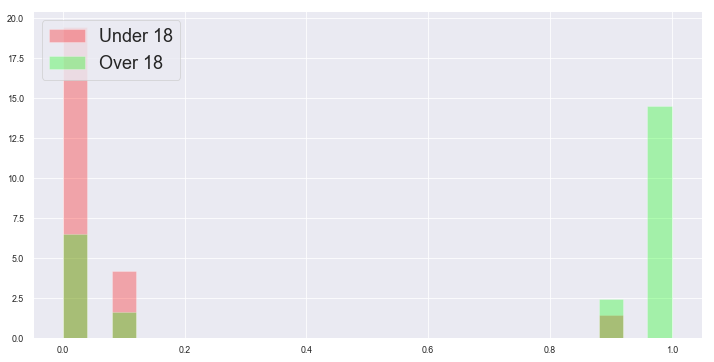

In [59]:
plotDistribution(p, y_test)

In [60]:
p_bad  = list(map(lambda x: x[0], filter(lambda x: x[-1], zip(p, y_test < 0.5))))
print(p_bad)

[4.5397868702434395e-05, 4.5397868702434395e-05, 0.0024726231566347743, 4.5397868702434395e-05, 8.315280276641321e-07, 0.11920292202211755, 4.5397868702434395e-05, 0.11920292202211755, 4.5397868702434395e-05, 8.315280276641321e-07, 0.8807970779778823, 5.109089028037221e-12, 8.315280276641321e-07, 0.11920292202211755, 4.5397868702434395e-05, 2.7894680920908113e-10, 1.522997951276035e-08, 2.7894680920908113e-10]


In [61]:
print(list(new_columns.values()))
len(y_test)

['1_classical', '1_punk', '1_folk', '1_country', '1_pop', '1_sheeran', '1_beatles', '1_eilish', '1_stones', '1_bowie', '1_summer', '2_cds', '2_stream', '2_radio', '2_internet', '3_wonderful', '3_starwars', '3_harrypotter', '3_loveactually', '3_casablanca', '3_toystory', '3_spaceodyssey', '3_backtofuture', '3_apocolypsenow', '3_none', '4_friends', '4_onlyfools', '4_doctorwho', '4_downtonabbey', '4_gavinandstacey', '4_gameofthrones', '4_thethickofit', '4_inbetweeners', '4_thenextstep', '4_none', '5_onlylive', '5_somelivesomerecord', '5_record', '5_online', '5_none', '6_none', '6_facebook', '6_twitter', '6_whatsapp', '6_instagram', '6_pintrest', '6_snapchat', '6_skype', '6_linkedin', '6_myspace', '7_none', '7_l2', '7_b2a5', '7_b5a10', '7_b10a20', '7_b20a30', '7_m30', '8_cash', '8_card', '8_applepay', '9_over18']


49

In [62]:
def plotROC(y_test, p):
    bad, good, _ = roc_curve(y_test, p)
    roc_auc = auc(bad, good)
    plt.figure(figsize=(8, 8))

    plt.plot(bad, good, color='red',
             lw=2, label='ROC curve, AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('fraction under 18')
    plt.ylabel('fraction over 18')
    plt.legend(loc="lower right", fontsize=18)
    plt.show()


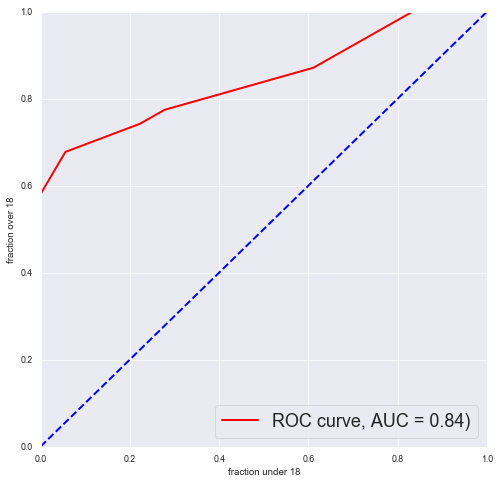

In [63]:
plotROC(y_test, p)

In [64]:
import os
def draw_tree(tree, n):
   
    out_name = "trees/tree_{0}".format(n)
    export_graphviz(tree, 
                out_file='{0}.dot'.format(out_name), 
                feature_names = columns_to_use,
                class_names   = ['under 18', 'over 18'],
                rounded = True, proportion = False, filled = True)
    os.system("dot -Tpng {0}.dot -o {0}.png -Gdpi=600".format(out_name))


trees = adabest.estimators_
for i,tree in enumerate(trees):
    draw_tree(tree,i)
len(trees)
os.system("rm *.dot")

256

In [ ]:
questions

In [ ]:
test_frame.columns
plotting_df = pd.DataFrame(columns=test_frame.columns[1:])
plotting_df

In [ ]:
temp_rows = []
for i,row in new_questions_df.head(n=200).iterrows():
    temp_dict = {key: 0 for key in test_frame.columns[1:]}
    
    for j,new_col in enumerate(temp_dict.keys()):
        print(new_col)
#         for col,val in zip(row,row.keys()):
        
        
    